In [69]:
# import libraries 
from langdetect import detect # detecting language 
from googletrans import Translator
# pip install googletrans==3.1.0a0
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt 
from wordcloud import WordCloud
from nltk.util import ngrams
import warnings
warnings.filterwarnings("ignore")
import pandas as pd 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation 
import contractions
import yake 
from rake_nltk import Rake
from unidecode import unidecode
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from gensim.models import Word2Vec
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

In [21]:
data = pd.read_csv("dataset_es_train.csv")
data.head(2)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics


In [22]:
data.shape

(200000, 8)

In [23]:
sample = data.sample(1000)
sample.reset_index(drop=True,inplace=True)

In [24]:
# what is difference between sample and population ?

In [25]:
df = sample[['review_body','stars']]

In [26]:
# language detection 
def lang_detect(data):
    lang = detect(data)
    return lang

In [27]:
print(df.review_body[0])
lang_detect(df.review_body[0])

Un buen producto para regalar, y con un envio rapido, que facilito que el regalo llegara a tiempo al cumple.


'es'

In [28]:
df['language'] = df.review_body.apply(lang_detect)

In [29]:
df.language.unique()

array(['es', 'ca', 'pt', 'fr', 'en', 'it', 'nl', 'cy', 'vi'], dtype=object)

In [30]:
df.language.value_counts()

es    984
pt      8
en      2
ca      1
fr      1
it      1
nl      1
cy      1
vi      1
Name: language, dtype: int64

In [31]:
def lang_trans(data):
    translor = Translator()
    translated_text = translor.translate(data)
    return translated_text.text

In [32]:
print(df.review_body[0])
lang_trans(df.review_body[0])

Un buen producto para regalar, y con un envio rapido, que facilito que el regalo llegara a tiempo al cumple.


'A good product to give as a gift, and with fast shipping, which made it easier for the gift to arrive on time for the birthday.'

In [33]:
df['translated_reviews'] = df.review_body.apply(lang_trans)

In [34]:
df

,review_body,stars,language,translated_reviews
0,"Un buen producto para regalar, y con un envio ...",3,es,"A good product to give as a gift, and with fas..."
1,"Funcionamiento correcto , los dígitos de la pa...",2,es,"Correct operation, the digits on the screen ar..."
2,No está el producto diseñado para mi expectati...,1,es,The product is not designed for my expectation...
3,"El mod esta bien, tiene buena batería, rápida ...",3,es,"The mod is good, it has a good battery, fast t..."
4,Las palomas no se asustaron y sus alas no resi...,1,es,The pigeons were not frightened and their wing...
...,...,...,...,...
995,"ha llegado con un golpe fuerte la lata, que la...",3,es,"The can has arrived with a strong blow, which ..."
996,"Biene muy bien, se monta fácil",3,es,"Very good, it is easy to assemble"
997,"La funda encaja bien, salvo en el sensor dacti...",4,es,"The cover fits well, except for the fingerprin..."
998,Compre dos para mis llaves y encajan perfectam...,5,es,I bought two for my keys and they fit perfectl...


In [35]:
# EDA # 
#ngrams 

def ngram_extractor(data,ngram_range):
#     tokens = word_tokenize(data)
    ngram = ngrams(data,ngram_range)
    ngram_list1 = []
    for ngram1 in ngram: # open or iterating over the zip file
        ngram_list1.append(" ".join(ngram1)) # appended unigrams in ngram_list1
    return ngram_list1
    


In [37]:
# preprocessing 
def expand_text(data):
    expanded_text = contractions.fix(data)
    return expanded_text
stopword_list = stopwords.words("english")
stopword_list.remove('no')
stopword_list.remove('nor')
stopword_list.remove('not')

def clean_data(data):
    tokens = word_tokenize(data)
    clean_text = [word.lower() for word in tokens if (word not in punctuation) and(word.lower() not in stopword_list) and(len(word)>2) and (word.isalpha())]
    return clean_text


In [38]:
clean_text = df.translated_reviews.apply(expand_text)
clean_text = clean_text.apply(clean_data)

In [39]:
clean_text

0      [good, product, give, gift, fast, shipping, ma...
1      [correct, operation, digits, screen, difficult...
2      [product, not, designed, expectation, think, a...
3      [mod, good, good, battery, fast, load, problem...
4      [pigeons, not, frightened, wings, not, resist,...
                             ...                        
995                  [arrived, strong, blow, disfigured]
996                               [good, easy, assemble]
997    [cover, fits, well, except, fingerprint, senso...
998    [bought, two, keys, fit, perfectly, comfortabl...
999                                         [small, bed]
Name: translated_reviews, Length: 1000, dtype: object

In [40]:

list_unigrams = clean_text.apply(lambda x :ngram_extractor(x,1))
final_unigram = []
for unigram in list_unigrams:
    final_unigram.extend(unigram)
    
cnt = Counter(final_unigram).most_common(25)

In [41]:
cnt

[('not', 770),
 ('good', 272),
 ('well', 144),
 ('one', 139),
 ('quality', 136),
 ('product', 125),
 ('price', 102),
 ('time', 98),
 ('like', 96),
 ('use', 81),
 ('little', 80),
 ('buy', 77),
 ('would', 72),
 ('bought', 70),
 ('perfect', 65),
 ('put', 65),
 ('arrived', 63),
 ('without', 61),
 ('recommend', 60),
 ('small', 60),
 ('lot', 58),
 ('work', 56),
 ('even', 55),
 ('since', 51),
 ('much', 51)]

In [42]:

list_bigrams = clean_text.apply(lambda x :ngram_extractor(x,2))
final_bigram = []
for bigram in list_bigrams:
    final_bigram.extend(bigram)
    
cnt = Counter(final_bigram).most_common(25)
cnt

[('good quality', 32),
 ('not like', 31),
 ('not buy', 29),
 ('not recommend', 29),
 ('not work', 29),
 ('not know', 27),
 ('poor quality', 22),
 ('would not', 20),
 ('good product', 17),
 ('not even', 14),
 ('good price', 14),
 ('not bad', 14),
 ('works well', 13),
 ('long time', 13),
 ('not fit', 13),
 ('not received', 13),
 ('not come', 11),
 ('quality price', 11),
 ('value money', 11),
 ('well not', 11),
 ('not give', 11),
 ('product not', 10),
 ('not good', 10),
 ('fits perfectly', 10),
 ('works perfectly', 10)]

In [43]:

list_trigrams = clean_text.apply(lambda x :ngram_extractor(x,3))
final_trigram = []
for trigram in list_trigrams:
    final_trigram.extend(trigram)
    
cnt = Counter(final_trigram).most_common(50)
cnt

[('would not buy', 9),
 ('not fit well', 6),
 ('good value money', 5),
 ('lasts long time', 5),
 ('not last long', 5),
 ('not work well', 4),
 ('price not ask', 4),
 ('not give stars', 4),
 ('good product good', 3),
 ('product good price', 3),
 ('good product although', 3),
 ('one not work', 3),
 ('battery lasts long', 3),
 ('product not arrive', 3),
 ('not stick well', 3),
 ('not good quality', 3),
 ('not recommend anyone', 3),
 ('not able get', 3),
 ('poor quality not', 3),
 ('not like not', 3),
 ('not like much', 3),
 ('good quality price', 3),
 ('not buy product', 3),
 ('not look good', 3),
 ('not give five', 3),
 ('give five stars', 3),
 ('product never arrived', 2),
 ('never arrived sent', 2),
 ('arrived sent messages', 2),
 ('sent messages numerous', 2),
 ('messages numerous times', 2),
 ('numerous times response', 2),
 ('not like anything', 2),
 ('not receive product', 2),
 ('see long last', 2),
 ('not understand send', 2),
 ('months use say', 2),
 ('seems good quality', 2),
 (

In [44]:
# filter 
test = df[(df.stars<3) ].reset_index(drop=True)

In [45]:
clean_text = test.translated_reviews.apply(expand_text)
clean_text = clean_text.apply(clean_data)
list_trigrams = clean_text.apply(lambda x :ngram_extractor(x,3))
final_trigram = []
for trigram in list_trigrams:
    final_trigram.extend(trigram)
    
cnt = Counter(final_trigram).most_common(50)
cnt

[('would not buy', 8),
 ('not fit well', 5),
 ('one not work', 3),
 ('not recommend anyone', 3),
 ('not able get', 3),
 ('poor quality not', 3),
 ('not buy product', 3),
 ('product never arrived', 2),
 ('never arrived sent', 2),
 ('arrived sent messages', 2),
 ('sent messages numerous', 2),
 ('messages numerous times', 2),
 ('numerous times response', 2),
 ('not like anything', 2),
 ('not receive product', 2),
 ('not understand send', 2),
 ('product poor quality', 2),
 ('still not arrived', 2),
 ('still not received', 2),
 ('not know anything', 2),
 ('still not work', 2),
 ('want return product', 2),
 ('product not arrive', 2),
 ('would like know', 2),
 ('not stick well', 2),
 ('not contact seller', 2),
 ('not buy not', 2),
 ('not received order', 2),
 ('record detects movement', 2),
 ('low quality product', 2),
 ('not received product', 2),
 ('not work well', 2),
 ('not last long', 2),
 ('printer not recognize', 2),
 ('not good quality', 2),
 ('twice first time', 2),
 ('lasts much les

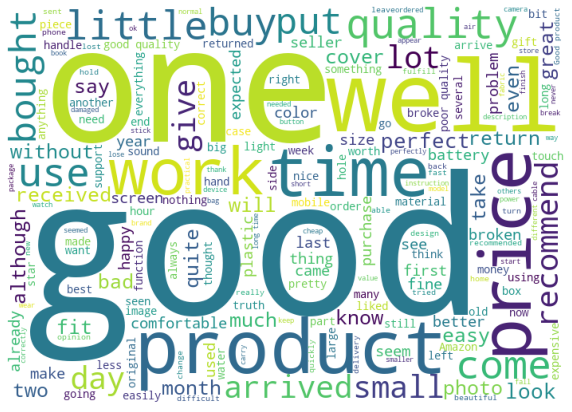

In [46]:
# wordcloud 
# "w1 w2 w3 w4"
def wordcloud(data,column):
    df_ = data[column].str.cat(sep=" ") # merged all reviews
    text = " ".join([word for word in df_.split()])
    wordcloud = WordCloud(width=700,height=500,background_color='white').generate(text)
    plt.figure(figsize=(10,16))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
wordcloud(df,"translated_reviews")

In [47]:
# keyphrase extractor 
def yake_extractor(data):
    keyword_extractor = yake.KeywordExtractor()
    keywords = keyword_extractor.extract_keywords(data)
    keyword_list = []
    for kw in keywords:
        keyword_list.append(kw[0])
    return keyword_list
keywords = df.translated_reviews.apply(yake_extractor)
all_keywords = []
for kw in keywords:
    all_keywords.extend(kw)
    
cnt = Counter(all_keywords).most_common(1000)
cnt

[('good', 167),
 ('quality', 115),
 ('product', 95),
 ('price', 85),
 ('time', 75),
 ('bought', 57),
 ('arrived', 55),
 ('buy', 55),
 ('small', 48),
 ('work', 46),
 ('Good', 46),
 ('recommend', 44),
 ('put', 44),
 ('lot', 43),
 ('perfect', 40),
 ('works', 38),
 ('received', 36),
 ('give', 33),
 ('great', 33),
 ('fine', 33),
 ('expected', 33),
 ('bad', 33),
 ('screen', 32),
 ('perfectly', 30),
 ('long', 30),
 ('return', 30),
 ('purchase', 30),
 ('day', 30),
 ('easy', 29),
 ('good quality', 29),
 ('problem', 28),
 ('happy', 28),
 ('comfortable', 28),
 ('months', 27),
 ('money', 27),
 ('broken', 27),
 ('cover', 26),
 ('battery', 25),
 ('bit', 25),
 ('plastic', 25),
 ('size', 25),
 ('photo', 24),
 ('nice', 24),
 ('seller', 23),
 ('thing', 23),
 ('days', 23),
 ('light', 22),
 ('poor', 21),
 ('fit', 21),
 ('pretty', 21),
 ('fast', 20),
 ('arrive', 20),
 ('poor quality', 20),
 ('fits', 20),
 ('delivery', 20),
 ('case', 19),
 ('color', 18),
 ('easily', 18),
 ('box', 18),
 ('month', 18),
 ('Ama

In [48]:
# keyphrase extractor 
def rake_extractor(data):
    keyword_extractor = Rake()
    keyword_extractor.extract_keywords_from_text(data)
    
    return keyword_extractor.get_ranked_phrases()
rake_keywords = df.translated_reviews.apply(rake_extractor)
print(keywords)
all_keywords = []
for kw in rake_keywords:
    all_keywords.extend(kw)
    
cnt = Counter(all_keywords).most_common(100)
cnt

0      [fast shipping, good product, product to give,...
1      [Correct operation, screen are difficult, stra...
2      [expectation, product, designed, abuse their d...
3      [fast to load, good battery, mod is good, good...
4      [episode of strong, strong wind, deteriorates ...
                             ...                        
995     [strong blow, blow, arrived, strong, disfigured]
996             [easy to assemble, good, assemble, easy]
997    [cover fits, fingerprint sensor, millimeters, ...
998    [fit perfectly, job perfectly, perfectly, pret...
999                                         [bed, small]
Name: translated_reviews, Length: 1000, dtype: object


[('good', 73),
 ('price', 70),
 ('product', 68),
 ('put', 61),
 ('one', 58),
 ('lot', 56),
 ('use', 56),
 ('bought', 56),
 ('like', 51),
 ('well', 50),
 ('time', 48),
 ('recommend', 48),
 ('buy', 47),
 ('quality', 40),
 ('give', 39),
 ('perfect', 39),
 ('know', 39),
 ('return', 38),
 ('work', 35),
 ('arrived', 35),
 ('received', 34),
 ('see', 33),
 ('easy', 33),
 ('although', 32),
 ('happy', 31),
 ('problem', 30),
 ('fine', 29),
 ('come', 27),
 ('think', 27),
 ('used', 27),
 ('expected', 27),
 ('would', 27),
 ('little', 26),
 ('good quality', 26),
 ('comfortable', 26),
 ('take', 25),
 ('small', 25),
 ('bad', 25),
 ('going', 24),
 ('photo', 23),
 ('...', 23),
 ('seller', 23),
 ('purchase', 23),
 ('screen', 22),
 ('truth', 22),
 ('comes', 22),
 ('since', 21),
 ('amazon', 21),
 ('case', 20),
 ('say', 20),
 ('cover', 20),
 ('returned', 19),
 ('battery', 19),
 ('nothing', 19),
 ('money', 19),
 ('arrive', 18),
 ('nice', 18),
 ('made', 17),
 ('mobile', 17),
 ('thought', 17),
 ('much', 17),
 (

In [49]:
# preprocessing 
# 1. remove spaces,newlines
def remove_spaces(data):
    clean_text = data.replace('\\n',' ').replace("\t",' ').replace('\\',' ')
    return clean_text

# 2. contraction mapping
def expand_text(data):
    expanded_text = contractions.fix(data)
    return expanded_text

# 3.handling accented character
def handling_accented(data):
    fixed_text = unidecode(data)
    return fixed_text

# 4. Cleaning 
stopword_list = stopwords.words("english")
stopword_list.remove('no')
stopword_list.remove('nor')
stopword_list.remove('not')

def clean_data(data):
    tokens = word_tokenize(data)
    clean_text = [word.lower() for word in tokens if (word not in punctuation) and(word.lower() not in stopword_list) and(len(word)>2) and (word.isalpha())]
    return clean_text

# 5.autocorrect 
def autocorrection(data):
    spell = Speller(lang='en')
    corrected_text = spell(data)
    return corrected_text

# 6. lemmatization
def lemmatization(data):
    lemmatizer = WordNetLemmatizer()
    final_data = []
    for word in data :
        lemmatized_word = lemmatizer.lemmatize(word)
        final_data.append(lemmatized_word)
    return " ".join(final_data)

In [50]:
clean_text_train = df.translated_reviews.apply(remove_spaces)


clean_text_train =clean_text_train.apply(expand_text)

clean_text_train = clean_text_train.apply(handling_accented)

clean_text_train = clean_text_train.apply(clean_data)

clean_text_train = clean_text_train.apply(lemmatization)


# Text Vectorization 

In [51]:
count_vect = CountVectorizer()
bow = count_vect.fit_transform(clean_text_train).A
pd.DataFrame(bow,columns=count_vect.get_feature_names())

,able,absent,absolute,absolutely,abuse,abysmal,accept,acceptable,accepting,access,...,year,yellow,yes,yesterday,yet,yoga,zero,zipper,zoom,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(clean_text_train).A
pd.DataFrame(tfidf,columns=tfidf_vect.get_feature_names())

,able,absent,absolute,absolutely,abuse,abysmal,accept,acceptable,accepting,access,...,year,yellow,yes,yesterday,yet,yoga,zero,zipper,zoom,zucchini
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.451567,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
# 
sent = clean_text_train.tolist()
splitted_sent = [sen.split() for sen in sent]
# print(splitted_sent)

In [54]:
# build word2vec 
word_2vec_model = Word2Vec(splitted_sent,min_count=2,window=3)

In [55]:
# word2vec model save 
word_2vec_model.save("word2vec.model")

In [56]:
word_2vec_model.vector_size

100

In [57]:
word_2vec_model.wv['bad']

array([-0.01986665,  0.04244422,  0.00066283,  0.01149831, -0.00498277,
       -0.08545092,  0.03584717,  0.1288631 , -0.03899737, -0.03579397,
       -0.02360931, -0.05715365, -0.02465108,  0.03063833,  0.01629567,
       -0.02431676,  0.00846706, -0.06463631, -0.00667499, -0.08300229,
        0.01652964,  0.02312559,  0.0139504 , -0.0060878 , -0.00654911,
       -0.0090118 , -0.02367788, -0.04267017, -0.04345564,  0.01790988,
        0.05498137,  0.00619442,  0.01718464, -0.04061   , -0.031563  ,
        0.07494233, -0.00136518, -0.05545453, -0.03587057, -0.08641976,
       -0.00919948, -0.04283071, -0.02306595,  0.0005879 ,  0.05370104,
       -0.02544964, -0.03188412, -0.0092154 ,  0.02195281,  0.04433551,
        0.01163083, -0.04864911, -0.01935926, -0.01088168, -0.02980245,
        0.02294113,  0.01020472, -0.03650362, -0.06064533,  0.03052564,
        0.01606623,  0.01383254, -0.00565781, -0.01463358, -0.06875253,
        0.04103564,  0.01897648,  0.03802945, -0.06426619,  0.06

In [58]:
# document numerical format 
def vectorizer(list_of_docs,model):
    feature = [] # to save vector representation of document 
    for rew in list_of_docs:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for word in rew :
            if word in model.wv :
                try :
                    vectors.append(model.wv[word])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            feature.append(avg_vec)
        else:
            feature.append(zero_vector)
    return feature
                

In [59]:
vectorized_docs = vectorizer(splitted_sent,word_2vec_model)

In [60]:
x_emb = np.array(vectorized_docs)

In [61]:
x_emb

array([[-0.01998701,  0.03859351,  0.00279894, ..., -0.0518847 ,
         0.00927539, -0.00421956],
       [-0.02465212,  0.04453117,  0.00390942, ..., -0.06480408,
         0.01528025, -0.0122178 ],
       [-0.0212175 ,  0.04495126,  0.00221046, ..., -0.05537027,
         0.01209138, -0.010387  ],
       ...,
       [-0.02204949,  0.03672569,  0.00449094, ..., -0.05184048,
         0.01193357, -0.00768985],
       [-0.02156349,  0.0400239 ,  0.00571174, ..., -0.05576597,
         0.01331986, -0.01059149],
       [-0.02087352,  0.02602082,  0.00114853, ..., -0.04243207,
         0.01420683, -0.0091531 ]], dtype=float32)

In [62]:
# build kmeans 

def build_kmeans(clusters,data):
    kmeans_model = KMeans(n_clusters=clusters)
    y_pred = kmeans_model.fit_predict(data)
    return kmeans_model,y_pred

In [63]:
# kmeans-count vectorizer 
kmeans_model_count,count_pred = build_kmeans(3,bow)

In [64]:
# kmeans-tfidf vectorizer 
kmeans_model_tfidf,tfidf_pred = build_kmeans(3,tfidf)

In [65]:
# kmeans-word2vec vectorizer 
kmeans_model_word2vec,word2vec_pred = build_kmeans(3,x_emb)

In [66]:
# dunn index,kappa score 

# evaluation 
print(f"Silhouette score with Kmeans-Count :  {silhouette_score(bow,count_pred)}")
print(f"Silhouette score with Kmeans-Tfidf :  {silhouette_score(tfidf,tfidf_pred)}")
print(f"Silhouette score with Kmeans-Word2vec :  {silhouette_score(x_emb,word2vec_pred)}")

Silhouette score with Kmeans-Count :  0.18042484470167305
Silhouette score with Kmeans-Tfidf :  0.006296286533128323
Silhouette score with Kmeans-Word2vec :  0.4650406837463379


In [67]:
# silhouette visulaizer 
def visulize_silhouette(data,model,title1):
    visualizer = SilhouetteVisualizer(model,colors="yellowbrick")
    visualizer.fit(data)
    
    plt.title(f"Silhouette visualizer for {title1}")


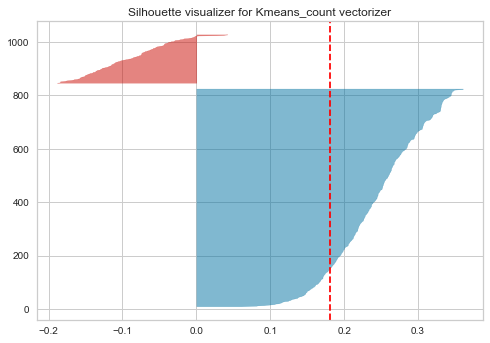

In [70]:
# kmeans-count 
visulize_silhouette(bow,kmeans_model_count,"Kmeans_count vectorizer")

In [71]:
from yellowbrick.cluster import SilhouetteVisualizer

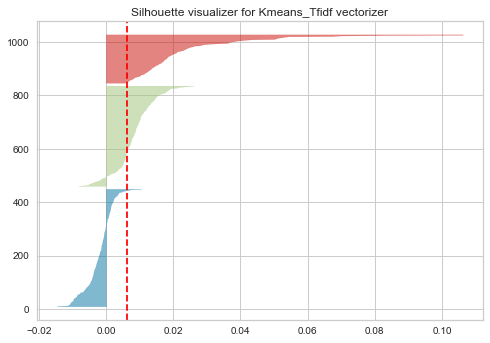

In [72]:
# kmeans-tfidf
visulize_silhouette(tfidf,kmeans_model_tfidf,"Kmeans_Tfidf vectorizer")

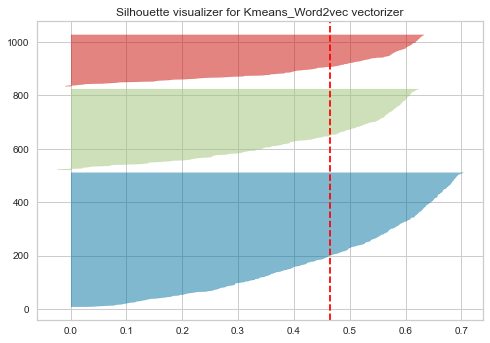

In [73]:
# kmeans-word2vec
visulize_silhouette(x_emb,kmeans_model_word2vec,"Kmeans_Word2vec vectorizer")

In [74]:
rew1 = "bad product quality, I will not recommend"
rew2 = "awful product quality, not recommending"

In [75]:
from numpy.linalg import norm

In [76]:
def cosine_distance(vect1,vect2):
    distance = (np.dot(vect1,vect2))/(norm(vect1)*norm(vect2))
    return distance

In [77]:
def yake_extractor(data):
    keyword_extractor = yake.KeywordExtractor()
    keywords = keyword_extractor.extract_keywords(data)
    keyword_list = []
    for kw in keywords:
        keyword_list.append(kw[0])
    return keyword_list


In [78]:
keyphrases_rew1 = yake_extractor(rew1) 
keyphrases_rew2 = yake_extractor(rew2) 

In [79]:
keyphrases_rew1.extend(keyphrases_rew2)

In [80]:
keyphrases_rew1

['bad product quality',
 'bad product',
 'product quality',
 'bad',
 'quality',
 'recommend',
 'product',
 'awful product quality',
 'awful product',
 'product quality',
 'awful',
 'quality',
 'recommending',
 'product']

In [81]:
final_keyphrases = [kw for kw in keyphrases_rew1 if (len(kw.split())>1)]

In [82]:
final_keyphrases

['bad product quality',
 'bad product',
 'product quality',
 'awful product quality',
 'awful product',
 'product quality']

In [83]:
# document numerical format 
def vectorizer(list_of_docs,model):
    feature = [] # to save vector representation of document 
    for rew in list_of_docs:
        tokens = rew.split()
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for word in tokens :
            if word in model.wv :
                try :
                    vectors.append(model.wv[word])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            feature.append(avg_vec)
        else:
            feature.append(zero_vector)
    return feature
                

In [84]:
dict1 = {}
for index,kw in enumerate(final_keyphrases):
    
    for kw2 in final_keyphrases:
        vect1,vect2 = vectorizer([kw,kw2],word_2vec_model)
        distance = cosine_distance(vect1,vect2)
        if distance>0.90:
            dict1[index]= [kw,kw2]

In [85]:
dict1

{0: ['bad product quality', 'product quality'],
 1: ['bad product', 'product quality'],
 2: ['product quality', 'product quality'],
 3: ['awful product quality', 'product quality'],
 4: ['awful product', 'product quality'],
 5: ['product quality', 'product quality']}

In [86]:
dict2 = {"product quality": ['bad product quality','product quality','bad product','awful product quality'],"customer service":['bad customer service','awful customer service']}

In [87]:
final_train = {}
for kw in yake_extractor(rew1):
    if kw in dict2["product quality"]:
        final_train[rew1]= "product quality"

In [88]:
final_train

{'bad product quality, I will not recommend': 'product quality'}